## Demo notebook for ETH RDM Summer School Workshop on Reproducibility
This is a Python Jupyter notebook prepared for the ETH RDM Summer School Workshop on Reproducibility. It demonstrates some of the features of Jupyter notebooks in the context of a dummy data analysis project.

### Import Python modules
First we import the required Python modules and setup the plotting environment.

In [26]:
import csv, os, wget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

%matplotlib inline

### Download and import example data
We would like to analyse some data related to the recent Covid-19 outbreak. The data is obtained from https://coviddata.github.io/coviddata/#csvs and available in CSV format.

In [27]:
# cases
if os.path.exists("cases.csv"):
    os.remove("cases.csv")
wget.download("https://coviddata.github.io/coviddata/v1/countries/cases.csv", "cases.csv")

# recoveries
if os.path.exists("recoveries.csv"):
    os.remove("recoveries.csv")
wget.download("https://coviddata.github.io/coviddata/v1/countries/recoveries.csv", "recoveries.csv")

# deaths
if os.path.exists("deaths.csv"):
    os.remove("deaths.csv")
wget.download("https://coviddata.github.io/coviddata/v1/countries/deaths.csv", "deaths.csv")

print('Finished downloading CSV data files.')

Finished downloading CSV data files.


In [28]:
def import_from_csv(csv_file, country):
    """
    Import dates and cases from CSV file for specific country and return as numpy arrays
    """
    
    dates = None
    data = None

    with open(csv_file) as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            if dates is None:
                dates = row[1:]
            if row[0] == country:
                data = row[1:]
    # convert data to numpy array
    data = np.array([int(x) for x in data])        
    
    return dates, data

Next we import the data from one country into Python. You could try to change the cell below to display the results from another country. To list all the countries, use the code:
`pd.read_csv('cases.csv', usecols=['Country'])`

In [29]:
# Import cases / recoveries / deaths for country from CSV file
country = "Switzerland"
dates, cases = import_from_csv('cases.csv', country)
dates, recoveries = import_from_csv('recoveries.csv', country)
dates, deaths = import_from_csv('deaths.csv', country)

### Plot the data and obtain some statistics

In [30]:
# calculate active cases
active = cases - recoveries - deaths

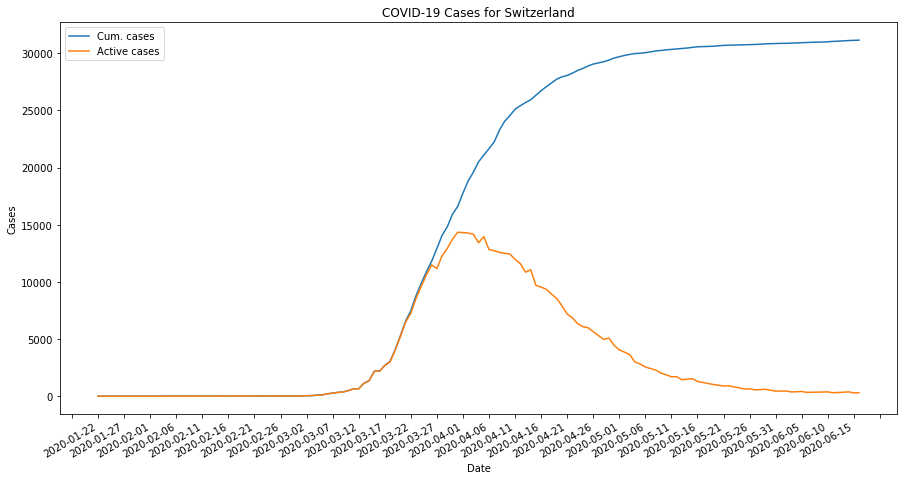

In [31]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
plt.plot(dates, cases)
plt.plot(dates, active)
plt.legend(['Cum. cases', 'Active cases'])

# Refine the x-axis
loc = plticker.MultipleLocator(base=5.0) # this locator puts x-ticks at regular intervals, i.e. every 5 days
ax.xaxis.set_major_locator(loc)

plt.title('COVID-19 Cases for %s' % (country))
plt.xlabel('Date'), plt.ylabel('Cases')

fig.autofmt_xdate()

### Plot weekly cases for last two months

In [32]:
dates_id = pd.to_datetime(dates)

if dates_id.is_unique and (dates_id[-1] - dates_id[0]).days + 1 == dates_id.size:
    print("Consecutive dates")

Consecutive dates


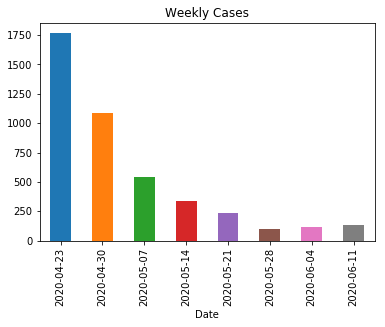

In [33]:
cum_cases_pd = pd.Series(cases, index=dates_id)
weekly_cases = cum_cases_pd.diff(periods=7)
weekly_cases.index = weekly_cases.index.date
weekly_cases.index.name = "Date"
weekly_cases.name = "Weekly Cases"
weekly_cases[-55::7].plot(title="Weekly Cases", kind="bar")

In [34]:
weekly_cases[-55::7]

Date
2020-04-23    1764.0
2020-04-30    1090.0
2020-05-07     540.0
2020-05-14     337.0
2020-05-21     231.0
2020-05-28     102.0
2020-06-04     117.0
2020-06-11     131.0
Name: Weekly Cases, dtype: float64